In [228]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt
import pandas as pd

from cluster_measurements import ClusterMeasurements
import iqbal_agn_heating_functions as iq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# pick values to match figure 1 top left
M500 = 2*10**14*u.Msun/1.25 # Mvir=M500*1.25
R500=1*u.Mpc
z=0

measurements=ClusterMeasurements(R500, M500, z)

Linj=7*10**44 * u.erg/u.s

In [12]:
x_vals=np.logspace(-2, 1)
rs=x_vals*R500

In [170]:
heating_03 = iq.vol_heating_rate(rs, measurements, Linj, 0.3*measurements.R500)
heating_01 = iq.vol_heating_rate(rs, measurements, Linj, 0.1*measurements.R500)

In [86]:
heating_03

<Quantity [-1.12204394e-24, -8.10347684e-25, -5.82789341e-25,
           -4.17200084e-25, -2.97154486e-25, -2.10495955e-25,
           -1.48239127e-25, -1.03753135e-25, -7.21541982e-26,
           -4.98541016e-26, -3.42247183e-26, -2.33488161e-26,
           -1.58349250e-26, -1.06796812e-26, -7.16530016e-27,
           -4.78305457e-27, -3.17607600e-27, -2.09664210e-27,
           -1.37446008e-27, -8.93386605e-28, -5.74633599e-28,
           -3.64900986e-28, -2.28159896e-28, -1.40054480e-28,
           -8.41247445e-29, -4.92662180e-29, -2.80184996e-29,
           -1.54066648e-29, -8.15165125e-30, -4.12804294e-30,
           -1.98905374e-30, -9.05964284e-31, -3.87228532e-31,
           -1.54049274e-31, -5.65170555e-32, -1.89227756e-32,
           -5.71352590e-33, -1.53470687e-33, -3.61049155e-34,
           -7.30678374e-35, -1.24599423e-35, -1.74809141e-36,
           -1.96288812e-37, -1.70875463e-38, -1.11158495e-39,
           -5.17890534e-41, -1.64539503e-42, -3.36870512e-44,
        

In [104]:
n_e = np.sqrt(0.704)*(iq.rho_g(rs, measurements)/const.m_p).to(u.Mpc**-3)
temp = iq.T_g(rs.value, measurements)
cooling = iq.vol_cooling_rate(n_e, temp)

200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


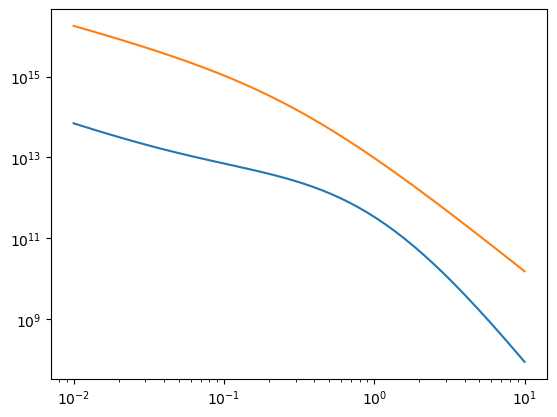

In [73]:
plt.loglog(rs, iq.rho_g(rs, measurements))
plt.loglog(rs, iq.rho_nfw(rs, measurements))
#iq.T_g(rs.value, measurements)

200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


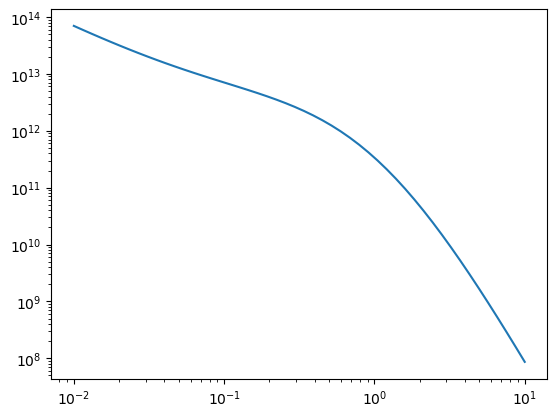

In [72]:
plt.loglog(rs, iq.rho_g(rs, measurements))

200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


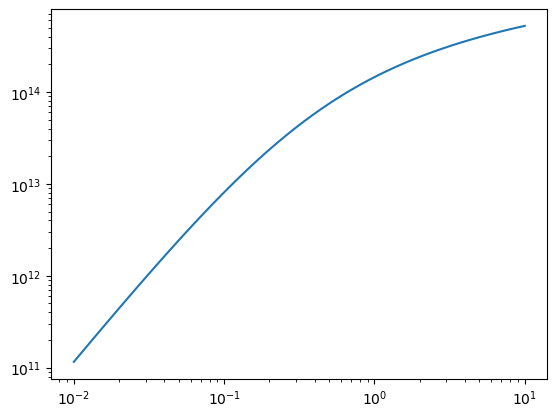

In [74]:
plt.loglog(rs, iq.M_enc(rs, measurements))

In [71]:
iq.virial_radius(M500/1.25, measurements.z)

128000000000000.0 solMass 0
101.14287921960845
1.2222436570290664e+32 solMass / Mpc3


<Quantity 1.30483787 Mpc>

In [66]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70,0.3)
cosmo.critical_density(z).to(u.Msun/u.Mpc**3)

<Quantity 1.22224366e+32 solMass / Mpc3>

In [70]:
(3*cosmo.H0**2/(8*np.pi*const.G)).to(u.Msun/u.Mpc**3)
#cosmo.critical_density(z).to(u.Msun/u.Mpc**3)

<Quantity 1.35992947e+11 solMass / Mpc3>

In [54]:
iq.overdensity(z)


101.14287921960845

In [47]:
(n_e**2*iq.cooling_function(temp)).to(u.erg/u.s * u.cm**-3)

<Quantity [1.05417301e-35, 1.19114069e-35, 1.34870803e-35, 1.53044408e-35,
           1.74055285e-35, 1.98394950e-35, 2.26631782e-35, 2.59412661e-35,
           2.97457262e-35, 3.41540143e-35, 3.92454142e-35, 4.50946696e-35,
           5.17619357e-35, 5.92780771e-35, 6.76246235e-35, 7.67084754e-35,
           8.63329452e-35, 9.61690484e-35, 1.05734108e-34, 1.14387962e-34,
           1.21359173e-34, 1.25812416e-34, 1.26961498e-34, 1.24218890e-34,
           1.17354243e-34, 1.06617244e-34, 9.27745652e-35, 7.70258437e-35,
           6.08006942e-35, 4.54859366e-35, 3.21657523e-35, 2.14570316e-35,
           1.34836816e-35, 7.97676211e-36, 4.44284395e-36, 2.33164891e-36,
           1.15472687e-36, 5.40779059e-37, 2.40115237e-37, 1.01389482e-37,
           4.08493520e-38, 1.57589659e-38, 5.84244054e-39, 2.08912327e-39,
           7.23087132e-40, 2.43096303e-40, 7.96463592e-41, 2.55103657e-41,
           8.01150535e-42, 2.47379415e-42] erg / (cm3 s)>

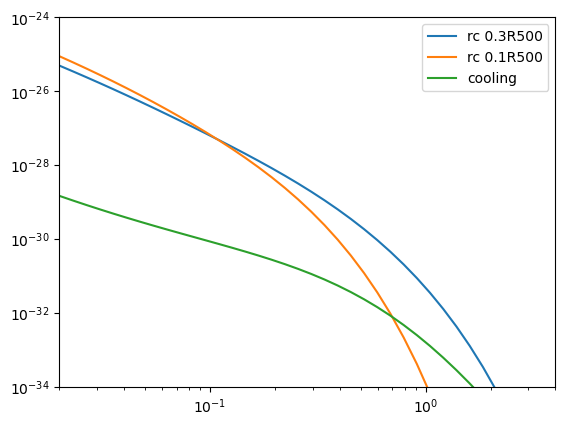

In [80]:
plt.loglog(x_vals, heating_03, label="rc 0.3R500")
plt.loglog(x_vals, heating_01, label="rc 0.1R500")
plt.loglog(x_vals, cooling, label="cooling")
plt.xlim(2*1e-2, 4*1e0)
plt.ylim(1e-34, 1e-24)
plt.legend()

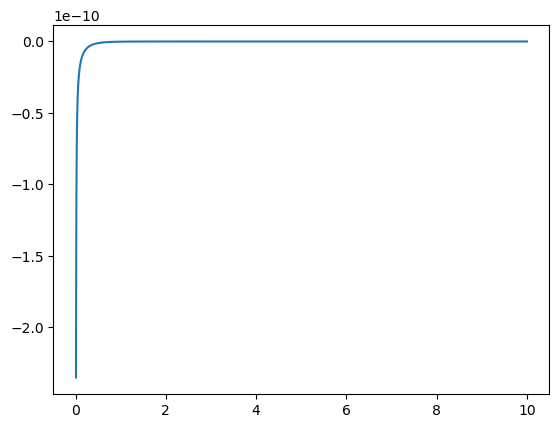

In [21]:
plt.plot(rs, iq.dP_dr(rs, measurements))

In [25]:
q= iq.q(measurements,0.015*measurements.R500,  0.3*measurements.R500)
iq.h(Linj, rs, 0.015*measurements.R500, 0.3*measurements.R500, q)

<Quantity [5.84262302e+50, 4.82916691e+50, 3.96573005e+50, 3.23350484e+50,
           2.61597655e+50, 2.09856555e+50, 1.66831920e+50, 1.31365281e+50,
           1.02414044e+50, 7.90355710e+49, 6.03762014e+49, 4.56647709e+49,
           3.42098298e+49, 2.53992748e+49, 1.87007987e+49, 1.36615117e+49,
           9.90542597e+48, 7.12817115e+48, 5.08914452e+48, 3.60198995e+48,
           2.52461661e+48, 1.74984956e+48, 1.19739685e+48, 8.07362293e+47,
           5.35207980e+47, 3.47923584e+47, 2.21139625e+47, 1.36958896e+47,
           8.23285254e+46, 4.78172081e+46, 2.66951349e+46, 1.42394159e+46,
           7.20723346e+45, 3.43409280e+45, 1.52633877e+45, 6.26199165e+44,
           2.34278020e+44, 7.88217128e+43, 2.34679637e+43, 6.06992568e+42,
           1.33510751e+42, 2.43679805e+41, 3.58777970e+40, 4.12486919e+39,
           3.56705337e+38, 2.22227966e+37, 9.49111470e+35, 2.62446478e+34,
           4.39933060e+32, 4.14423899e+30] cm(3/4) erg(3/4) / (Mpc2 s)>

In [100]:
iq_heating_03 = pd.read_csv('data/iqbal_heating_03.csv', header=None)
iq_heating_01 = pd.read_csv('data/iqbal_heating_01.csv', header=None)
iq_cooling = pd.read_csv('data/iqbal_cooling.csv', header=None)

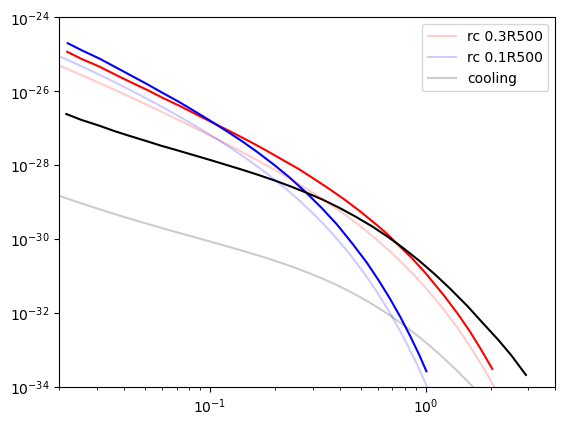

In [109]:
plt.loglog(iq_heating_03[0], iq_heating_03[1], color="red")
plt.loglog(iq_heating_01[0], iq_heating_01[1], color="blue")
plt.loglog(iq_cooling[0], iq_cooling[1], color="black")

plt.loglog(x_vals, heating_03, label="rc 0.3R500", color="red", alpha=0.2)
plt.loglog(x_vals, heating_01, label="rc 0.1R500", color="blue", alpha=0.2)
plt.loglog(x_vals, cooling, label="cooling", color="black", alpha=0.2)

plt.xlim(2*1e-2, 4*1e0)
plt.ylim(1e-34, 1e-24)
plt.legend()

In [245]:
from scipy.integrate import trapezoid as trap
print(trap(iq_heating_03[1], iq_heating_03[0]) )
trap(iq_cooling[1], iq_cooling[0])

1.4227029563617316e-27


5.32180747364336e-29

In [115]:
measurements2 = ClusterMeasurements(1*u.Mpc, 6*1e14/1.25 * u.Msun, 0)
iq.P500(measurements2)

<Quantity 2.2558647e-12 erg / cm3>

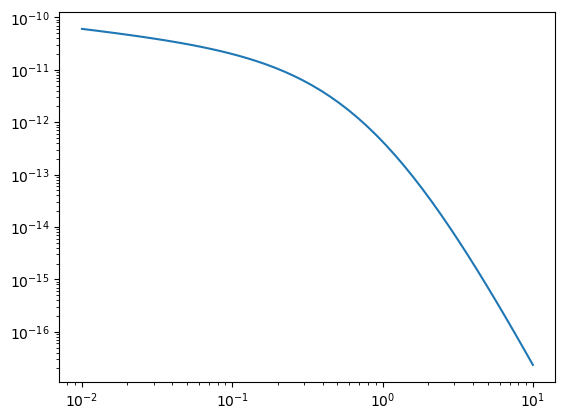

In [118]:
plt.loglog(rs, iq.Pg(rs/measurements2.R500, measurements2))

In [119]:
iq.Pg(rs/measurements2.R500, measurements2)

<Quantity [6.03755965e-11, 5.74382569e-11, 5.45894788e-11, 5.18221790e-11,
           4.91294470e-11, 4.65045842e-11, 4.39411612e-11, 4.14330951e-11,
           3.89747517e-11, 3.65610747e-11, 3.41877461e-11, 3.18513778e-11,
           2.95497338e-11, 2.72819776e-11, 2.50489356e-11, 2.28533566e-11,
           2.07001442e-11, 1.85965238e-11, 1.65521004e-11, 1.45787565e-11,
           1.26903369e-11, 1.09020826e-11, 9.22979147e-12, 7.68873044e-12,
           6.29236784e-12, 5.05105626e-12, 3.97084072e-12, 3.05258982e-12,
           2.29162631e-12, 1.67796457e-12, 1.19715424e-12, 8.31607596e-13,
           5.62189022e-13, 3.69800353e-13, 2.36718961e-13, 1.47526767e-13,
           8.95767060e-14, 5.30432336e-14, 3.06684757e-14, 1.73368917e-14,
           9.59641508e-15, 5.20930335e-15, 2.77760669e-15, 1.45702544e-15,
           7.53073088e-16, 3.84080111e-16, 1.93565133e-16, 9.65202634e-17,
           4.76779718e-17, 2.33561901e-17] erg / cm3>

[0.0197991324585666,
 0.0206467713813189,
 0.0215307854934736,
 0.0224527009664105,
 0.0234140245484087,
 0.0244165355880183,
 0.02546192717594,
 0.0265520771026588,
 0.027688996641752,
 0.0288745478378601,
 0.0301108432033354,
 0.0314000539619216,
 0.0327444254930812,
 0.0341464529366171,
 0.035608572444296,
 0.0371332561106663,
 0.0387231571090269,
 0.0403811314585921,
 0.0421101659954519,
 0.0439131839346769,
 0.0457935319954603,
 0.0477541230125294,
 0.0497991380485209,
 0.0519316097649131,
 0.0541549946660192,
 0.056473990515187,
 0.058892592075423,
 0.0614141077564005,
 0.0640441690314524,
 0.066786786430217,
 0.0696464950003671,
 0.0726289701774993,
 0.0757395824723474,
 0.0789828167087981,
 0.0823649290320975,
 0.0858928726604086,
 0.0895710075187628,
 0.0934063337972302,
 0.0974078216164756,
 0.1015798142002673,
 0.1059293920352879,
 0.1104674002518573,
 0.1151995267490876,
 0.1201318107056746,
 0.1252786792069924,
 0.1306444149470042,
 0.136240123015773,
 0.1420755853603491,


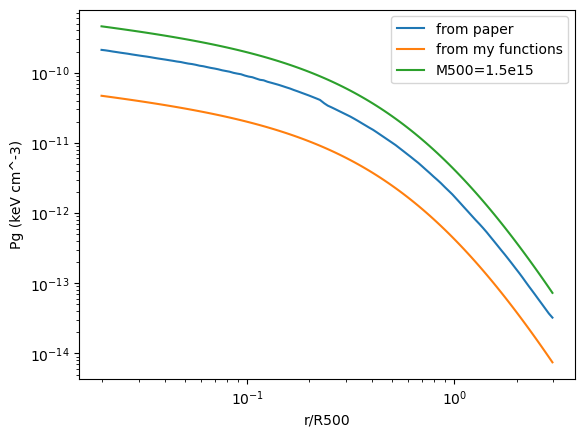

In [334]:
iq_pressure = pd.read_csv('data/iqbal_pressure.csv', header=None)
plt.loglog(iq_pressure[0], iq_pressure[1], label="from paper")
#ClusterMeasurements(1*u.Mpc, 10*1e14*u.Msun, 0)
#ClusterMeasurements(1*u.Mpc, 6*1e14*u.Msun/1.25, 1)
plt.loglog(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), measurements2), label="from my functions")
plt.loglog(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), ClusterMeasurements(1*u.Mpc, 15*1e14*u.Msun, 0)), label="M500=1.5e15")
plt.xlabel("r/R500")
plt.ylabel("Pg (keV cm^-3)")
plt.legend()



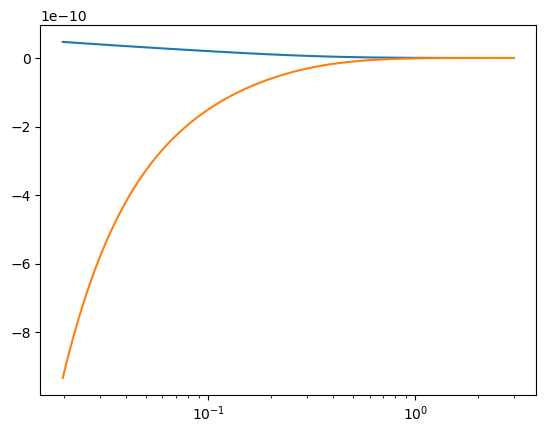

In [218]:
plt.plot(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), measurements2), label="from my functions")

plt.plot(iq_pressure[0], iq.dP_dr(iq_pressure[0], measurements2))
plt.xscale("log")

In [155]:
iq.P500(measurements2)

<Quantity 2.2558647e-12 erg / cm3>

In [147]:
measurements2.M500

<Quantity 4.8e+14 solMass>

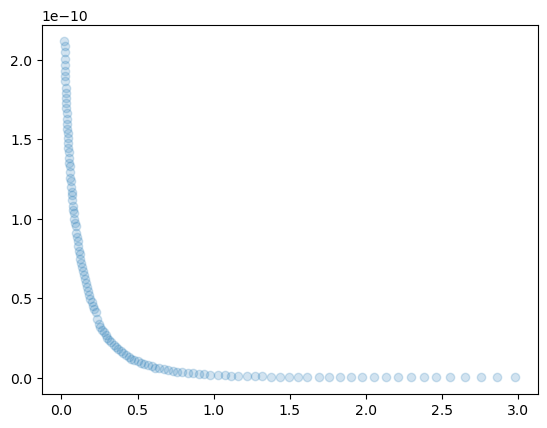

In [194]:
iq_pressure[0]
plt.scatter(iq_pressure[0], iq_pressure[1], alpha=0.2)

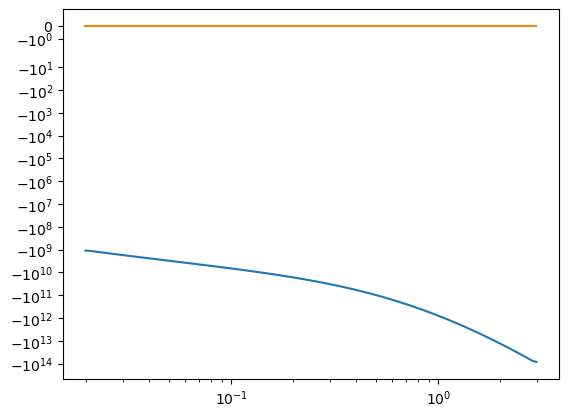

In [236]:
iq_dPdr = np.gradient(iq_pressure[0], iq_pressure[1])
#plt.plot(iq_pressure[0], iq_dPdr)
#plt.plot(iq_pressure[0], iq.dP_dr(list(iq_pressure[0]), measurements2))
plt.plot(iq_pressure[0], np.gradient(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), measurements2)))

from scipy.optimize import approx_fprime
plt.plot(
    iq_pressure[0],
    [approx_fprime(r,
                   lambda x: iq.Pg(x, measurements2),
                  epsilon=r*1e-8) for r in iq_pressure[0]])

plt.yscale("symlog")
plt.xscale("log")

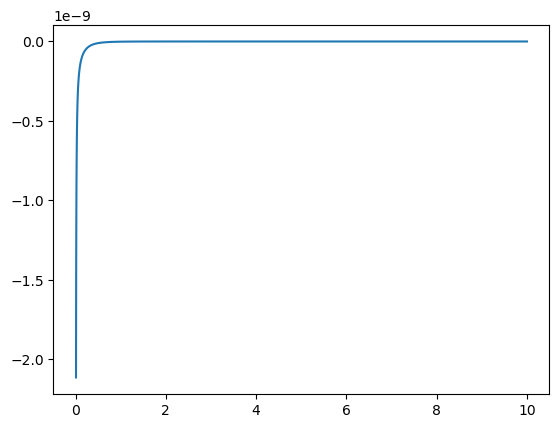

In [172]:
plt.plot(rs, iq.dP_dr(rs, measurements2))

In [177]:
iq.dP_dr(list(iq_pressure[0]), measurements2)

<Quantity [-9.32191407e-10, -8.87656368e-10, -8.45383687e-10,
           -8.05254083e-10, -7.67157397e-10, -7.30980958e-10,
           -6.96624094e-10, -6.63987693e-10, -6.32976892e-10,
           -6.03508127e-10, -5.75497677e-10, -5.48867120e-10,
           -5.23542572e-10, -4.99451502e-10, -4.76528333e-10,
           -4.54711787e-10, -4.33942572e-10, -4.14163512e-10,
           -3.95320636e-10, -3.77364912e-10, -3.60247078e-10,
           -3.43925554e-10, -3.28351903e-10, -3.13490579e-10,
           -2.99305190e-10, -2.85754845e-10, -2.72806706e-10,
           -2.60433639e-10, -2.48599564e-10, -2.37279119e-10,
           -2.26446490e-10, -2.16073985e-10, -2.06137741e-10,
           -1.96618513e-10, -1.87493476e-10, -1.78740534e-10,
           -1.70345806e-10, -1.62290404e-10, -1.54553819e-10,
           -1.47126316e-10, -1.39993733e-10, -1.33137777e-10,
           -1.26549903e-10, -1.20221323e-10, -1.14134064e-10,
           -1.08284077e-10, -1.02660115e-10, -9.72537037e-11,
        

In [175]:
np.gradient(iq_pressure[0], iq.Pg_r(list(iq_pressure[0])*u.Mpc, measurements2))

array([-1.09909800e+09, -1.12672571e+09, -1.18307655e+09, -1.24204457e+09,
       -1.30373361e+09, -1.36826538e+09, -1.43575661e+09, -1.50633683e+09,
       -1.58014505e+09, -1.65731196e+09, -1.73798618e+09, -1.82232201e+09,
       -1.91048111e+09, -2.00264434e+09, -2.09899208e+09, -2.19971133e+09,
       -2.30500596e+09, -2.41509904e+09, -2.53022895e+09, -2.65063791e+09,
       -2.77660532e+09, -2.90839251e+09, -3.04635788e+09, -3.19079608e+09,
       -3.34204732e+09, -3.50055403e+09, -3.66673085e+09, -3.84097016e+09,
       -4.02385094e+09, -4.21586967e+09, -4.41759478e+09, -4.62971363e+09,
       -4.85293560e+09, -5.08795667e+09, -5.33565702e+09, -5.59703003e+09,
       -5.87294902e+09, -6.16456520e+09, -6.47326878e+09, -6.80019666e+09,
       -7.14681298e+09, -7.51500944e+09, -7.90640789e+09, -8.32282158e+09,
       -8.76695180e+09, -9.24084507e+09, -9.74737794e+09, -1.02895772e+10,
       -1.08708769e+10, -1.14949990e+10, -1.21661022e+10, -1.28890437e+10,
       -1.36688645e+10, -

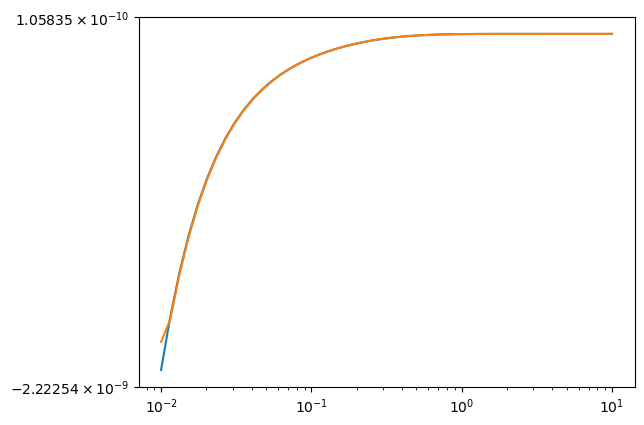

In [240]:
plt.plot(rs, iq.dP_dr(rs, measurements2), label="from approx_fprime")
plt.plot(rs,np.gradient(iq.Pg(rs/measurements2.R500, measurements2), rs), label="from np gradient" )
plt.xscale('log')
plt.yscale('symlog')

In [185]:
np.gradient(iq_pressure[0], iq.Pg(list(iq_pressure[0])*u.Mpc/measurements2.R500, measurements2))

<Quantity [-1.09909800e+09, -1.12672571e+09, -1.18307655e+09,
           -1.24204457e+09, -1.30373361e+09, -1.36826538e+09,
           -1.43575661e+09, -1.50633683e+09, -1.58014505e+09,
           -1.65731196e+09, -1.73798618e+09, -1.82232201e+09,
           -1.91048111e+09, -2.00264434e+09, -2.09899208e+09,
           -2.19971133e+09, -2.30500596e+09, -2.41509904e+09,
           -2.53022895e+09, -2.65063791e+09, -2.77660532e+09,
           -2.90839251e+09, -3.04635788e+09, -3.19079608e+09,
           -3.34204732e+09, -3.50055403e+09, -3.66673085e+09,
           -3.84097016e+09, -4.02385094e+09, -4.21586967e+09,
           -4.41759478e+09, -4.62971363e+09, -4.85293560e+09,
           -5.08795667e+09, -5.33565702e+09, -5.59703003e+09,
           -5.87294902e+09, -6.16456520e+09, -6.47326878e+09,
           -6.80019666e+09, -7.14681298e+09, -7.51500944e+09,
           -7.90640789e+09, -8.32282158e+09, -8.76695180e+09,
           -9.24084507e+09, -9.74737794e+09, -1.02895772e+10,
        

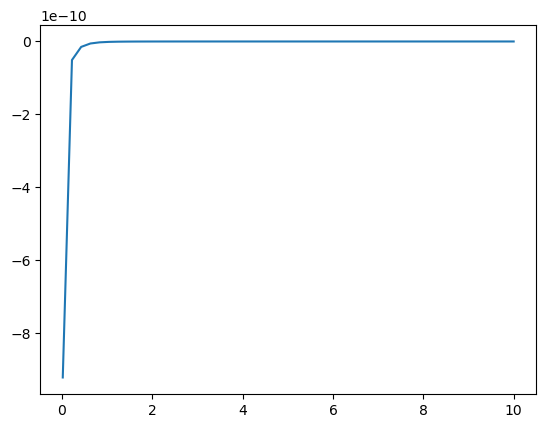

In [186]:
rs_lin = np.linspace(0.02, 10)*u.Mpc
plt.plot(rs_lin, iq.dP_dr(rs_lin, measurements2))

In [199]:
def fprime(r, measurements):
    eps = r*1e-8
    return ((iq.Pg(r+eps, measurements)) - iq.Pg(r, measurements))/eps

In [200]:
[fprime(r,measurements2) for r in iq_pressure[0]]

[<Quantity -9.32466657e-10 erg / cm3>,
 <Quantity -8.87906974e-10 erg / cm3>,
 <Quantity -8.45611878e-10 erg / cm3>,
 <Quantity -8.05461869e-10 erg / cm3>,
 <Quantity -7.67346503e-10 erg / cm3>,
 <Quantity -7.31153121e-10 erg / cm3>,
 <Quantity -6.96781057e-10 erg / cm3>,
 <Quantity -6.64130603e-10 erg / cm3>,
 <Quantity -6.33107044e-10 erg / cm3>,
 <Quantity -6.03626757e-10 erg / cm3>,
 <Quantity -5.75605804e-10 erg / cm3>,
 <Quantity -5.48965768e-10 erg / cm3>,
 <Quantity -5.23632577e-10 erg / cm3>,
 <Quantity -4.99533616e-10 erg / cm3>,
 <Quantity -4.76603246e-10 erg / cm3>,
 <Quantity -4.54780121e-10 erg / cm3>,
 <Quantity -4.34004981e-10 erg / cm3>,
 <Quantity -4.14220501e-10 erg / cm3>,
 <Quantity -3.9537269e-10 erg / cm3>,
 <Quantity -3.7741248e-10 erg / cm3>,
 <Quantity -3.60290564e-10 erg / cm3>,
 <Quantity -3.43965376e-10 erg / cm3>,
 <Quantity -3.28388354e-10 erg / cm3>,
 <Quantity -3.13523907e-10 erg / cm3>,
 <Quantity -2.99335691e-10 erg / cm3>,
 <Quantity -2.85782811e-10 

In [206]:
(iq_pressure[0][0], iq_pressure[0][1])*u.Mpc

<Quantity [0.01979913, 0.02064677] Mpc>

In [231]:
((iq.Pg(iq_pressure[0][1], measurements2) - iq.Pg(iq_pressure[0][0], measurements2))/((iq_pressure[0][1] - iq_pressure[0][0])*u.Mpc))

<Quantity -9.09836979e-10 erg / (cm3 Mpc)>

In [274]:
iq.Pg(iq_pressure[0][1], measurements2)

<Quantity 4.61354684e-11 erg / cm3>

In [266]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70, 0.3)
def M(r, z, r_s):
    delta = 500
    rho_c = (3*cosmo.H(z)**2/(8*np.pi*const.G)).to(u.g/u.cm**3)
    return (4*np.pi*rho_c*r_s**3 * (np.log(1+r/r_s) - (r/r_s)/(1+r/r_s))).to(u.Msun)
    
    

In [267]:
(3*cosmo.H(z)**2/(8*np.pi*const.G)).to(u.g/u.cm**3)

<Quantity 9.20387392e-30 g / cm3>

In [268]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70, 0.3)
cosmo.critical_density(0)

<Quantity 8.27202935e-09 g / cm3>

In [269]:
Rvir = iq.virial_radius(6*10**14*u.Msun, 0)
Rvir

<Quantity 2.18375367 Mpc>

In [270]:
iq.scale_radius(6*10**14*u.Msun, 0)

<Quantity 0.42897675 Mpc>

In [271]:
R500 = 1*u.Mpc
M(R500, z, iq.scale_radius(6*10**14*u.Msun, 0))

<Quantity 6.79258975e+10 solMass>

In [272]:
iq.overdensity(0)

101.14287921960845

In [273]:
iq.c_vir(6*10**14*u.Msun, 0)

<Quantity 5.09061079>

In [339]:
def m500(y, Mvir):
    fac = 4*np.pi*rhoc
    rvir = Rvir(Mvir)
    cvir = Cvir(Mvir)
    rs = c500*rvir
    ## cvir below should be c500!!\n",
    #cterm = cvir**3/(np.log(1+cvir)-cvir/(1+cvir))
    cterm = c500**3/(np.log(1+c500)-c500/(1+c500))
    deltac = 500*cosmo.Om0/3.
    logfac = np.log(1+y) - y/(1+y)
    return fac*logfac*rs**3*deltac*cterm

In [319]:
from astropy.cosmology import WMAP9 as cosmo
rhoc = (3*cosmo.H(z)**2/(8*np.pi*const.G)).to(u.g/u.cm**3)
rhoc

<Quantity 9.02592435e-30 g / cm3>

In [320]:
Deltac = 18*np.pi**2 + 82*(cosmo.Om0-1.)-39.*(cosmo.Om0-1)**2
Deltac

99.29167146960845

In [321]:
def Rvir(Mvir):
    denom = 4*np.pi/3*Deltac*rhoc
    return (Mvir/denom)**(1./3.)
Rvir(6e14*u.Msun).to(u.Mpc)

<Quantity 2.21158754 Mpc>

In [322]:
def Cvir(Mvir):
    mterm = (Mvir/(2e12/0.7*u.Msun))**(-0.081)
    zterm = (1)**(-0.71)
    return 7.85*mterm*zterm
Cvir(6e14*u.Msun)

<Quantity 5.09061079>

In [323]:
ys = np.linspace(0,1,100)

In [324]:
m500(1.0, 6e14*u.Msun)

<Quantity 2.1652145e+14 solMass>

In [325]:
c500=1.09

In [326]:
m500(1.0, 6e14*u.Msun)

<Quantity 2.1652145e+14 solMass>

In [305]:
Mvir = 6e14*u.Msun
cvir = Cvir(Mvir)
cvir**3/(np.log(1+cvir)-cvir/(1+cvir))



<Quantity 135.86866054>

In [306]:
c500**3/(np.log(1+c500)-c500/(1+c500))

6.0057097346301

In [309]:
R500 = (Rvir(Mvir)*c500/Cvir(Mvir)).to(u.Mpc)

In [338]:
rs = Rvir(Mvir)/Cvir(Mvir)
y = R500/rs
m500(y, Mvir)

<Quantity 1.47884356e+17 solMass>

In [ ]:
Mvir = 6